![1.png](images/1.png)

![2.png](images/2.png)

In [3]:
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()
options(repr.plot.width=5, repr.plot.height=5)

In [47]:
ptruncnormal<-function(x){
    res<-0
    res<-exp((-1)*x*x/2)*sqrt(2/pi)
    res[x<0]<-0
    res    
}

In [46]:
pmajorizing<-function(x){
    sapply(x,function(y){
    res<-NA
    if (y<0){res<-0}
    if ((y>=0)&&(y<=1)){
    res<-sqrt(2/pi) ## uniform
 }
    if (y>1){
    res<-2*exp(-2*(y-1))/(sqrt(2*pi)) ## exponential with rate 2 shifted by 1
    }
    res
    },simplify=TRUE)
}


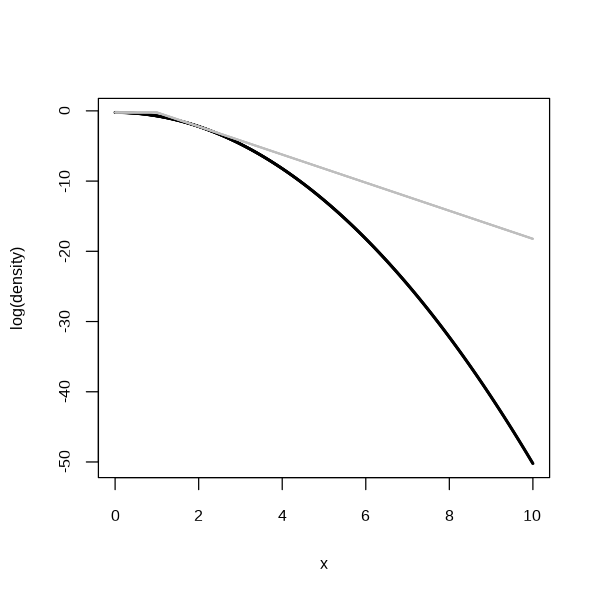

In [6]:
vx<-seq(0,10,by=0.01)
plot(vx,log(ptruncnormal(vx)),pch=19,cex=0.2,xlab="x",ylab="log(density)",main="")
points(vx,log(pmajorizing(vx)),pch=19,cex=0.1,col="gray")

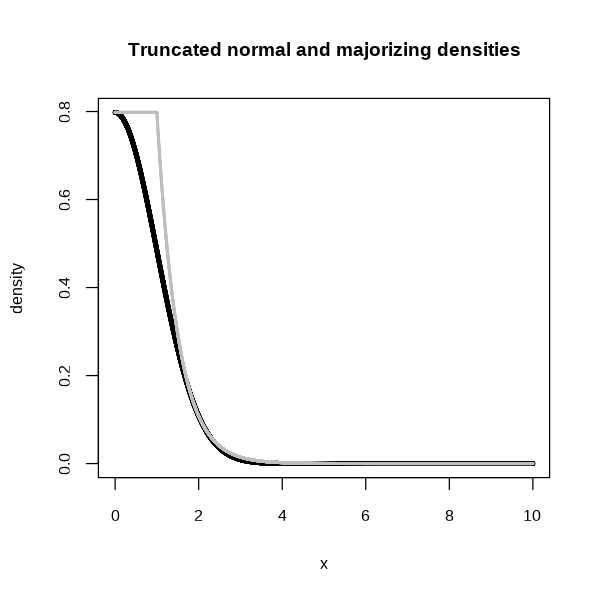

In [7]:
vx<-seq(0,10,by=0.001)
plot(vx,(ptruncnormal(vx)),pch=19,cex=0.4,xlab="x",ylab="density",
     main="Truncated normal and majorizing densities")
points(vx,(pmajorizing(vx)),pch=19,cex=0.2,col="gray")

In [8]:
rmajorizing<-function(n){
    sapply(1:n,function(i){
	res<-NA
	component<-sample(1:2,1,prob=c(2/3,1/3))
	if(component==1){res<-runif(1)}
	if(component==2){res<-rexp(1,rate=2)+1} #exponential density shifted by 1
	res
    })
}


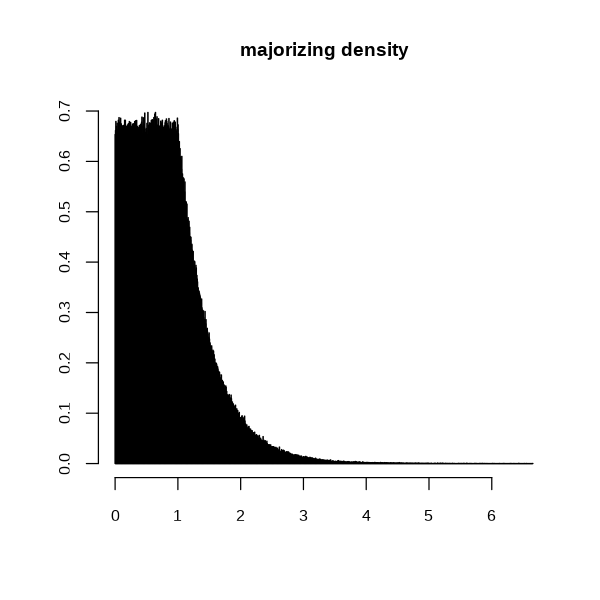

In [9]:
Nsample<-1000000
num_histbreaks<-1000
hist(rmajorizing(Nsample),breaks=1000,col="black",xlab="",ylab="",
     main="majorizing density",freq=FALSE)


In [10]:
fgentruncnormal<-function(c){
    x<-NA
    num_reject<-0
    while (is.na(x)){
	y<-rmajorizing(1)
	u<-runif(1)
	if (u<=ptruncnormal(y)/(c*pmajorizing(y))){x<-y}
	else{num_reject<-num_reject+1}
    }
    c(x,num_reject)
}


In [11]:

c<- 1
vtruncnormal_acceptreject<-sapply(rep(c,Nsample),fgentruncnormal)[1,]
vtruncnormal_direct<-rnorm(2*Nsample) 
vtruncnormal_direct<-vtruncnormal_direct[vtruncnormal_direct>=0]

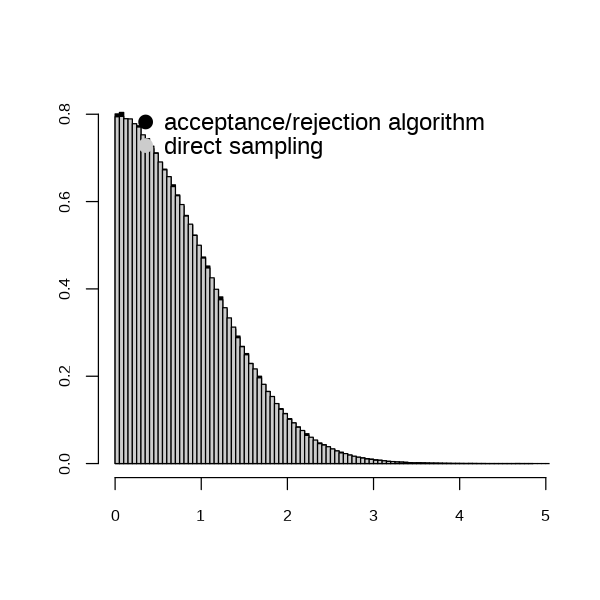

In [12]:
hist(vtruncnormal_acceptreject,col="black",
     breaks=100,xlab="",ylab="",freq=FALSE,main="")
hist(vtruncnormal_direct,col=gray(0.8),
     breaks=100,xlab="",ylab="",freq=FALSE,main="",add=TRUE)
legend("topright",pch=19,cex=1.5,
       legend=c("acceptance/rejection algorithm","direct sampling"),
       col=c("black",gray(0.8)),bty="n")




# Lab

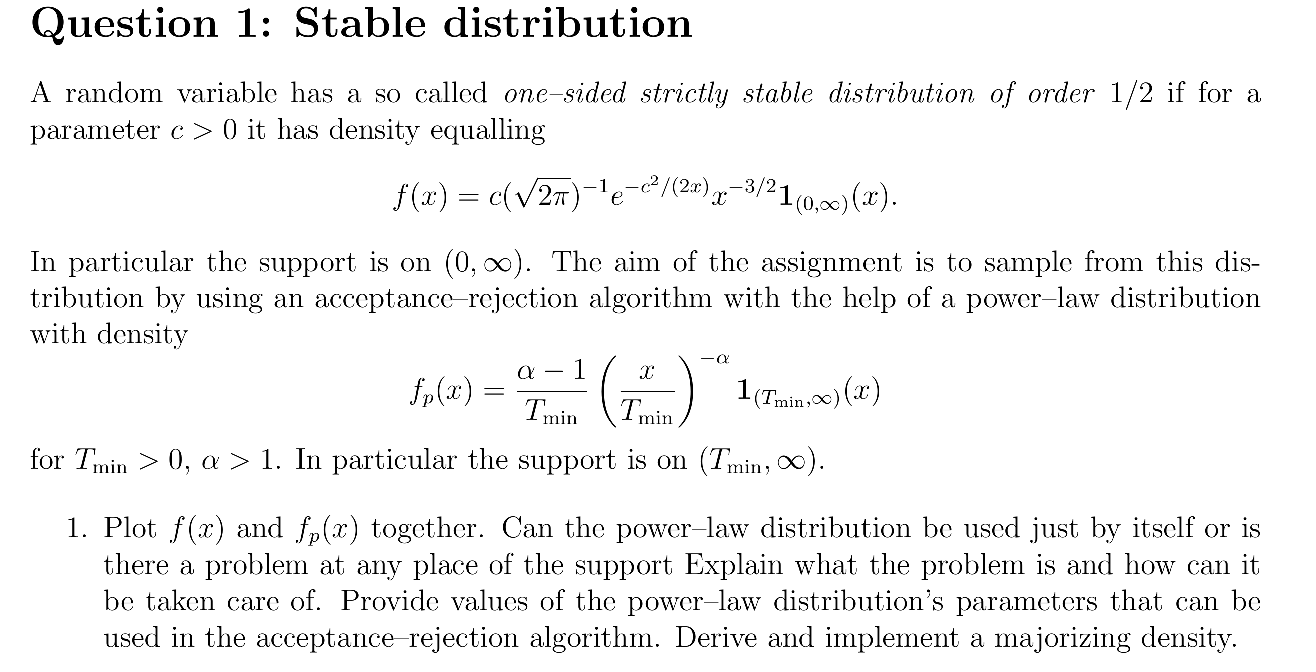

The support for power law is from tmin to infinity , but our target function is on support from 0 to infinity. Hence we cannot use power law by itself. However we can combine it with uniform distribution for 0 to tmin support.
Since the max(f(x)) is achieved when the value of x is c^2/3, we have chosen tmin value to be the same, because powerlaw is strictly decreasing function and maximum of it will be at tmin. 

Majorizing density function is combination of uniform density and powerlaw density function.
$$ Majority density = (probability*uniform density*1[0,tmin]) + (1-probability\space *\space powerlaw density*1[tmin,\inf] ) $$ 
$$ where \space probablity = \int_0^{tmin} f(x) dx$$
Then we can find majorizing constant as follows
$$ MajoringConstant = max\left(\frac{f(x)}{majoritydensity(x)}\right) $$
We know that our majority density takes 2 parts ,
1> When x<tmin , here f(x) = target function and g(x) is uniform density. Here we just need to find max(f(x)) as g(x) would just be a constant here , and max(f(x)) is achieved when x is c^2/3.
$$f(x) = c(\sqrt{2\pi})^{-1} e^{\frac {-c^2} {2x}} x^{ \frac {-3}{2}} 1_{(0,\infty)}(x)$$
$$log{f(xlog(c)-log(\sqrt2\pi)-\frac{c^2}{2x}-\frac{3}{2}\log(x)}$$

$$\frac{\partial }{\partial x}\log(f(x))=\frac{c^2}{2x^2} - \frac{3}{2x} = 0$$

$$x_{maj}=\frac{c^2}{3}$$
2> When x > tmin, here g(x) is powerlaw

$$\frac {\partial}{\partial x} \frac{f(x)}{g(x)} = \frac{3^{a-1} c^3 \frac{e^{-c^2}}{2 x} \left(\frac{x}{c^2}\right)^a \left((2 a-3) x+c^2\right)}{2 \sqrt{2 \pi } (a-1) x^{7/2}} = 0$$
$$ x_{maj}=\frac{c^2}{3-2 a}$$
 Now we can see the limitation on alpha , $a$ should be in the range from 1 and 1.5. Alpha greater than 1.5 will end up giving negetive majorising constant. Hence we are fixing our alpha to 1.3.

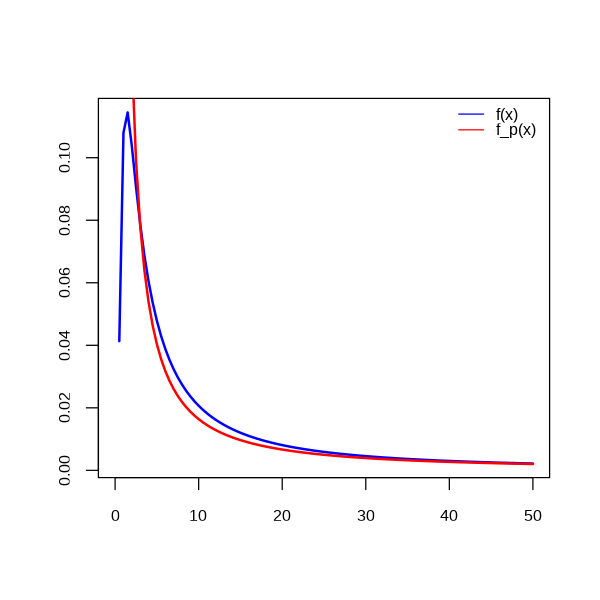

In [13]:

c = 2
curve(c* (1/sqrt(2*pi) * exp(-(c**2)/(2*x)))*x^(-3/2),0,50,col='blue'
      ,ylab = ' ',xlab = ' ',lwd=2)
a = 1.3
Tmin = 1.33
curve((a - 1)/Tmin *(x/Tmin)^(-a),0,50,col = 'red',add = TRUE,lwd=2)
legend('topright',col=c('blue','red'),legend = c('f(x)','f_p(x)'),lty=c(1,1),bty='n')

In [29]:
f.x = function(c,x){

    res = c* (1/sqrt(2*pi) * exp(-(c**2)/(2*x)))*x^(-3/2)
     res[x<0]=0
  return(res)
}

In [30]:
f.x(2,4/3)

[1] 0.1156352

In [31]:
f.p = function(a,Tmin,x){
  res = (a - 1)/Tmin *(x/Tmin)^(-a)
  res[x<0] = 0
  return(res)
}

In [32]:
f.p(1.3,4/3,4/3)

[1] 0.225

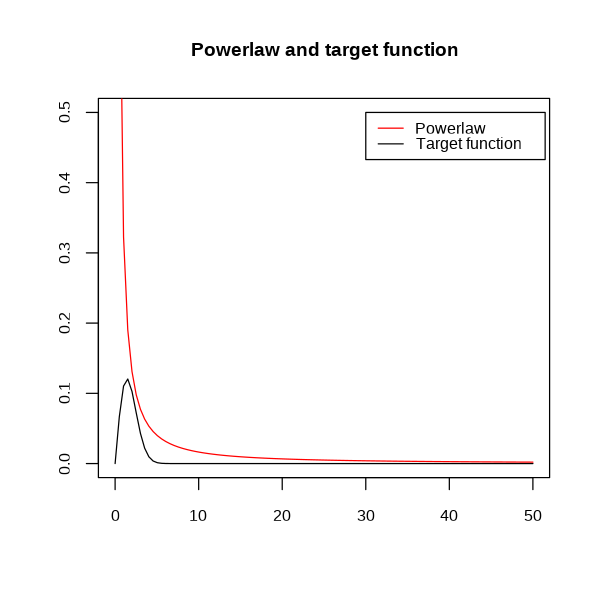

In [16]:
c = 2
tmin = 1.33
a = 1.3
x = seq(0,50,length.out = 100)
plot(x, f.x(x,c), type = "l", ylim = c(0,0.5),xlab = "", ylab = "")
lines(x,f.p(x = x,a = a,Tmin = tmin),col="red")
title("Powerlaw and target function")
legend(30,0.5,legend = c("Powerlaw","Target function"),
lty = 1, col = c("red","black"))


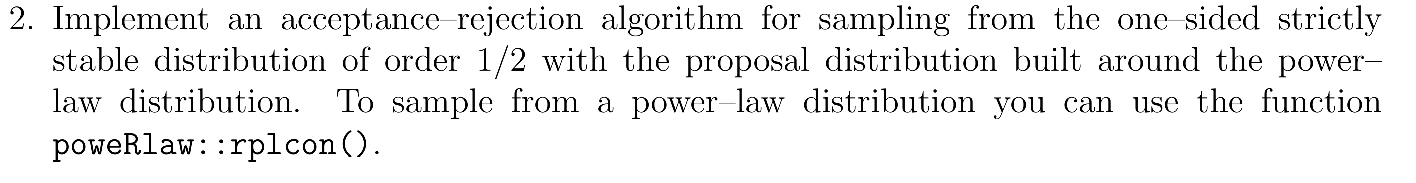

In [17]:
library(poweRlaw)

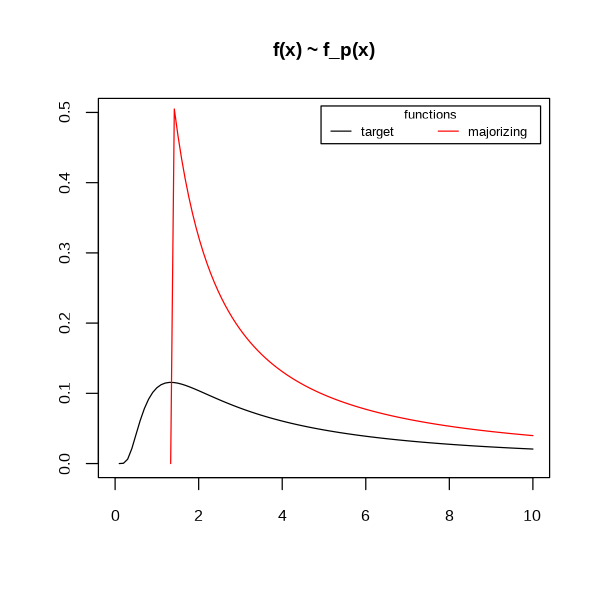

In [18]:
#########
### 1 ###
#########

c = 2
t_min = 1.33
alpha = 1.3

plot(1, xlim = c(0,10), ylim = c(0, 0.5), type = "n", xlab = "", ylab = "", main = "f(x) ~ f_p(x)")
curve(eval(c) * (sqrt(2 * pi)^(-1)) * exp(-eval(c)^(2) / (2 * x)) * x^(-3/2), from=0, to=10, add=TRUE, col="black")

curve(ifelse(x > t_min, (eval(alpha) - 1 / eval(t_min)) * (x / eval(t_min))^(-eval(alpha)), 0), from=t_min, to=10, add=TRUE, col="red")

legend("topright", inset=.02, title="functions",
       c("target","majorizing"), horiz=TRUE, cex=0.8, col = 1:2, lty = 1)




In [24]:
#########
### 2 ###
#########

target_fun = function(x, c) {
  res = 0
  res = ((c * (sqrt(2 * pi)^(-1)) * exp((-c^(2)) / (2 * x)) * x^(-3/2)))
  res[x<0] = 0
  return (res)
}

power_law = function(x, alpha, t_min) {
  return(((alpha - 1) / t_min) * (x / t_min)^(-alpha))
}


majorizing_fun = function(x, alpha, t_min) {
  sapply(x, function(y) {
    res = NA
    if (y<0) {
      res = 0
    }
    if ((y>=0) && (y<=t_min)) {
      res = power_law(t_min, alpha, t_min)
    }
    if (y>t_min) {
      res = power_law(y, alpha, t_min)
    }	
    res
  }, simplify = TRUE)
}



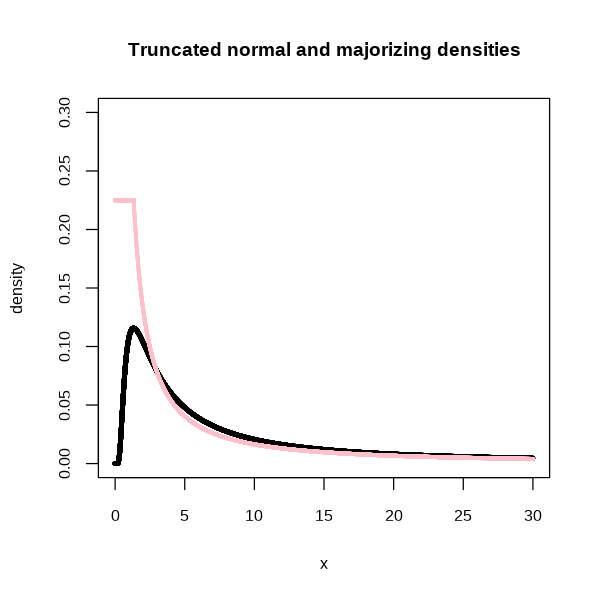

In [25]:
alpha = 1.3
c = 2
t_min = c^2/3

# Find out maximum value max(f(x)) for given parameters
x_max_target = c * (sqrt(2 * pi)^(-1)) * exp(-c^(2) / (2 * (c^2/3))) * (c^2/3)^(-3/2)

# Plot both the target function and the combined majorizing function
vx = c(seq(0, t_min, t_min/10000), seq(t_min, 30, 30/10000))
plot(vx, (target_fun(vx, c)), pch=19, cex=0.4, xlab="x", 
     ylab="density", main="Truncated normal and majorizing densities",ylim=c(0,.3))
points(vx, (majorizing_fun(vx, alpha, t_min)), pch=19, cex=0.3, col="pink")



In [28]:
  major_c_uniform = 2^(-2) * 1 / sqrt(2 * pi) * 3^(3/2) * exp(-3/2)
major_c_uniform

[1] 0.1156352

In [50]:
#########
### 3 ###
#########

Nsample=10000

rmajorizing=function(n){
  sapply(1:n,function(i){
    res=rplcon(1, t_min, alpha)
    return(res)
  })
}


fgentruncnormal=function(c_target){
  x=NA
  major_c_uniform = c_target^(-2) * 1 / sqrt(2 * pi) * 3^(3/2) * exp(-3/2)
  major_c_pow_law = 2 * c_target / sqrt(2 * pi)
  prob = integrate(target_fun, 0, t_min, c_target)$value
    #print(prob)
  num_reject=0
  num_tries=0
  while (is.na(x)){
    num_tries = num_tries + 1
    u=runif(1)
    if (u > prob) {
      y=rmajorizing(1)
      if (u<=target_fun(y, c_target)/(major_c_pow_law*majorizing_fun(y, alpha, t_min))){
        x=y
      } else{
        num_reject=num_reject+1
      }
    } else {
      y=runif(1)
      if (u<=target_fun(y, c_target)/(major_c_uniform*majorizing_fun(y, alpha, t_min))){
        x=y
      } else{
        num_reject=num_reject+1
      }
    }
  }
  c(x,num_reject,num_tries)
}




Mean:  581.5525
Var:  66830926
Rejection rate:  0.4482454

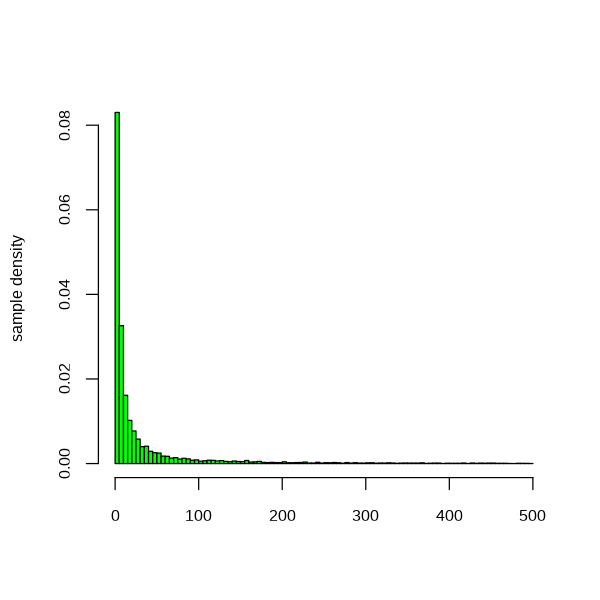

In [52]:
c_vals_target = c(2)

for (i in 1:length(c_vals_target)) {
  vtruncnormal_acceptreject = sapply(rep(c_vals_target[i],Nsample), fgentruncnormal)
  vtruncnormal_acceptreject_density_vals = vtruncnormal_acceptreject[1,]
  vtruncnormal_acceptreject_density_vals = 
    vtruncnormal_acceptreject_density_vals[vtruncnormal_acceptreject_density_vals <= 500]
  
  hist(vtruncnormal_acceptreject_density_vals, col="green", breaks=100, xlab="", ylab="sample density", freq=FALSE, main="")
  
  vtruncnormal_acceptreject_mean = mean(vtruncnormal_acceptreject[1,])
  vtruncnormal_acceptreject_var = var(vtruncnormal_acceptreject[1,])
  
  cat("\nMean: ", vtruncnormal_acceptreject_mean)
  cat("\nVar: " , vtruncnormal_acceptreject_var)
  
  num_rejections = sum(vtruncnormal_acceptreject[2,])
  num_tries = sum(vtruncnormal_acceptreject[3,])
  rejection_rate = num_rejections/num_tries
  cat("\nRejection rate: ", rejection_rate)
}



Mean:  10.05764
Var:  1277.046
Rejection rate:  0.2463637

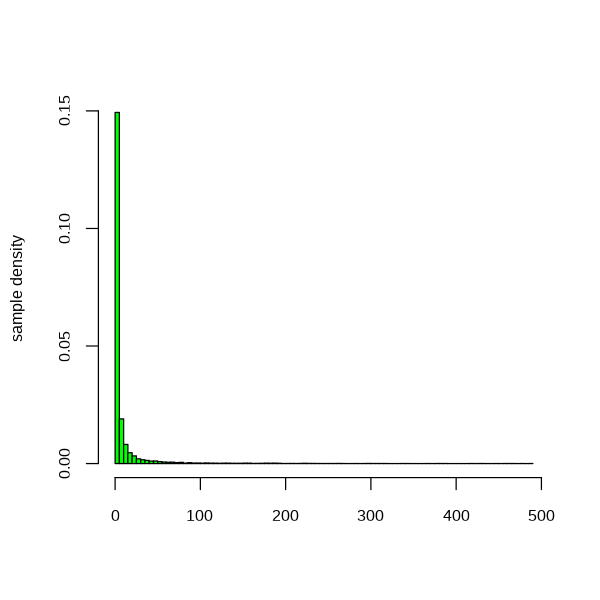


Mean:  372036.6
Var:  4.445684e+14
Rejection rate:  0.7513366

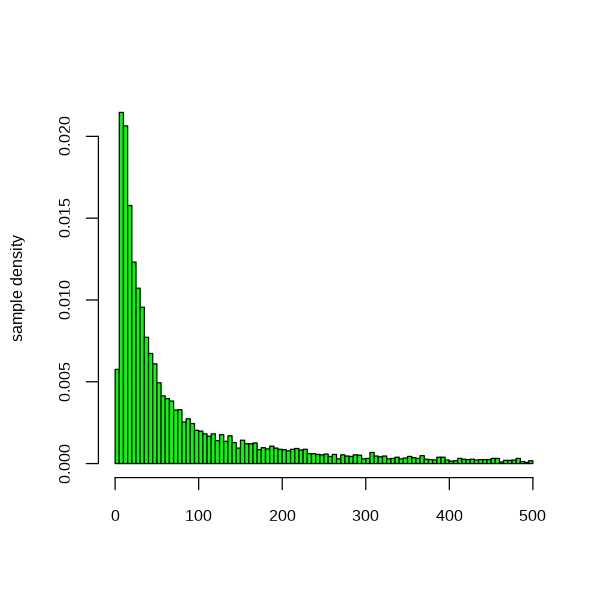


Mean:  20794432
Var:  3.858363e+18
Rejection rate:  0.8746097

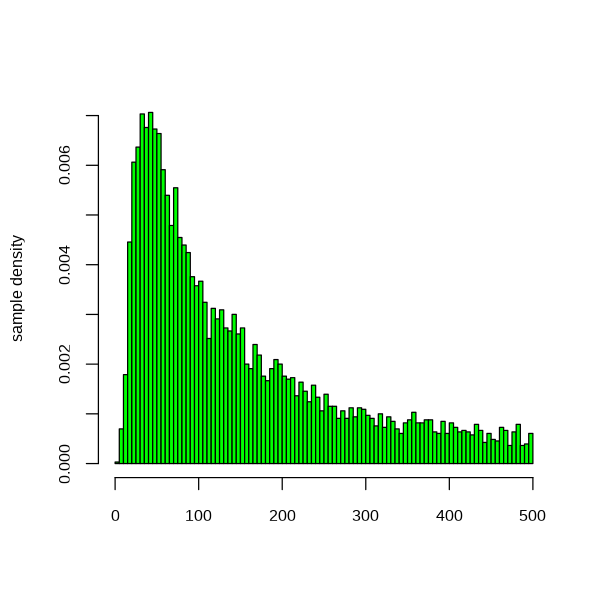

In [23]:
c_vals_target = c(1,5,10)
for (i in 1:length(c_vals_target)) {
  vtruncnormal_acceptreject = sapply(rep(c_vals_target[i],Nsample), fgentruncnormal)
  vtruncnormal_acceptreject_density_vals = vtruncnormal_acceptreject[1,]
  vtruncnormal_acceptreject_density_vals = vtruncnormal_acceptreject_density_vals[vtruncnormal_acceptreject_density_vals <= 500]

  hist(vtruncnormal_acceptreject_density_vals, col="green", breaks=100, xlab="", ylab="sample density", freq=FALSE, main="")
  
  vtruncnormal_acceptreject_mean = mean(vtruncnormal_acceptreject[1,])
  vtruncnormal_acceptreject_var = var(vtruncnormal_acceptreject[1,])
  
  cat("\nMean: ", vtruncnormal_acceptreject_mean)
  cat("\nVar: " , vtruncnormal_acceptreject_var)
  
  num_rejections = sum(vtruncnormal_acceptreject[2,])
  num_tries = sum(vtruncnormal_acceptreject[3,])
  rejection_rate = num_rejections/num_tries
  cat("\nRejection rate: ", rejection_rate)
}
